In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nlte

from utils import *

In [3]:
element = nlte.O1Inasan()
"""
13S3S - fast level
12P1D4 - 
"""
element.keys = element.all_keys
# element.keys = ["12P3P4", "12P1D4", "13S3S"]
# element.keys = ["12P3P4", "13S3S"]

population_nlte_1 = [0.0 for _ in range(len(element.keys))]
population_nlte_1[0] = 1.0

count = int(10)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e10, num=count)
optical_depth = 0.0

wavelengths_step = (
    (nlte.SunGueymard.wavelengths[-1] - nlte.SunGueymard.wavelengths[0]) / 100.0
)

delta_time = 0.01

In [3]:
b_factors = calculate_b_factors(
    element=element,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    wavelengths_step=wavelengths_step,
    transitions_types=[
        "ce_regemorter", # "ce_inasan_o1",
        # "rbb_doppler_inasan_o1",
        # "rbb_voigt_inasan_o1",
        # "rbf_inasan_o1",
        "se_nist_o1",
        "pe_tasitsiomi",
        "pi_tasitsiomi",
        "dr_badnell",
        "rr_badnell",
    ]
)

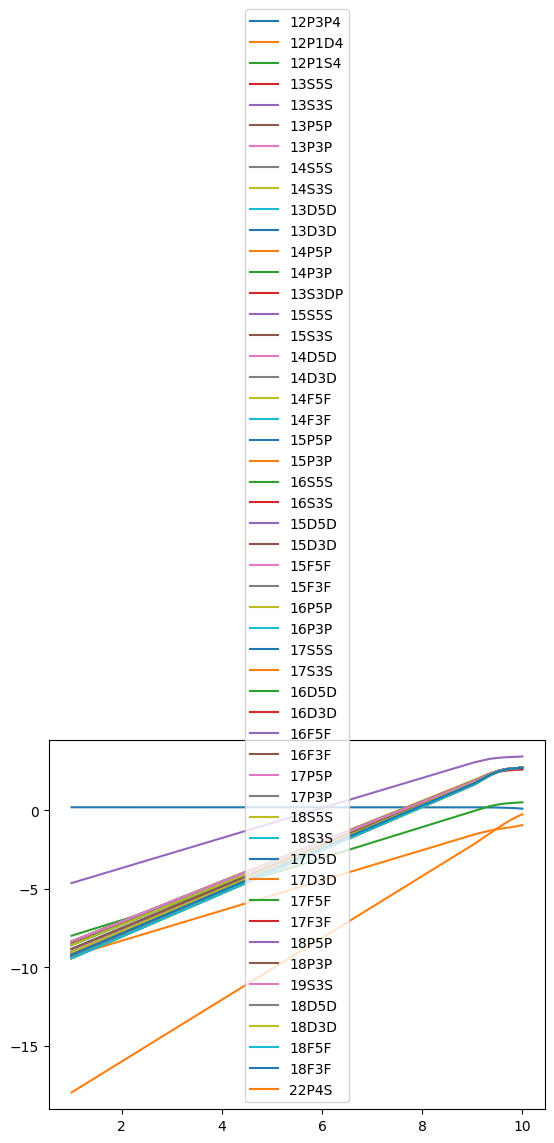

In [ ]:
for i, key in enumerate(element.keys):
    plt.plot(
        np.log10(electron_number_densities),
        np.log10(b_factors.T[i]),
        label=key,
    )
plt.legend()
plt.show()